In [1]:

import numpy  as np
import pandas as pd


from models.classifiers import Classifiers
from models.custom_ml_classifiers import CustomMLClassifiers

import warnings
warnings.filterwarnings('ignore')


/Users/firattamur/Desktop/spring22/indr491/QNBFinansBank/env/lib/python3.8/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [2]:

# data paths
path_train_baseline = "./data/train_imputed_balanced_onehotencoded.csv"


In [3]:

# read data into data frame
df_train = pd.read_csv(path_train_baseline)
df_train.head()


,ID,VAR0,VAR1,VAR2,VAR3,VAR4,VAR5,VAR6,VAR7,VAR8,...,CAT158,CAT159,CAT160,CAT161,CAT162,CAT163,CAT164,CAT165,CAT166,CAT167
0,0,0.799805,0.184174,0.000000,0.000000,0.168984,0.037037,0.000000,0.200195,0.788112,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,1,0.725049,0.180594,0.000000,0.000000,0.165312,0.090790,0.054237,0.255107,0.722679,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,2,0.799805,0.199255,0.000000,0.000000,0.167613,0.000000,0.000000,0.200195,0.788112,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,3,0.677137,0.209870,0.166667,0.181818,0.190511,0.222222,0.125000,0.322863,0.788112,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,4,0.725049,0.180594,0.000000,0.000000,0.165312,0.000000,0.054237,0.255107,0.722679,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


Training GAUSSIANNB...
 executed in 2.1 seconds.
Training DecisionTree...
 executed in 6.4 seconds.
Training KNeighbors...
 executed in 324.7 seconds.
Training LogisticReg...
 executed in 5.9 seconds.
Training RandomForest...
 executed in 41.4 seconds.
Training XGBoost...
[03:03:29] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[03:03:49] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[03:04:15] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'b

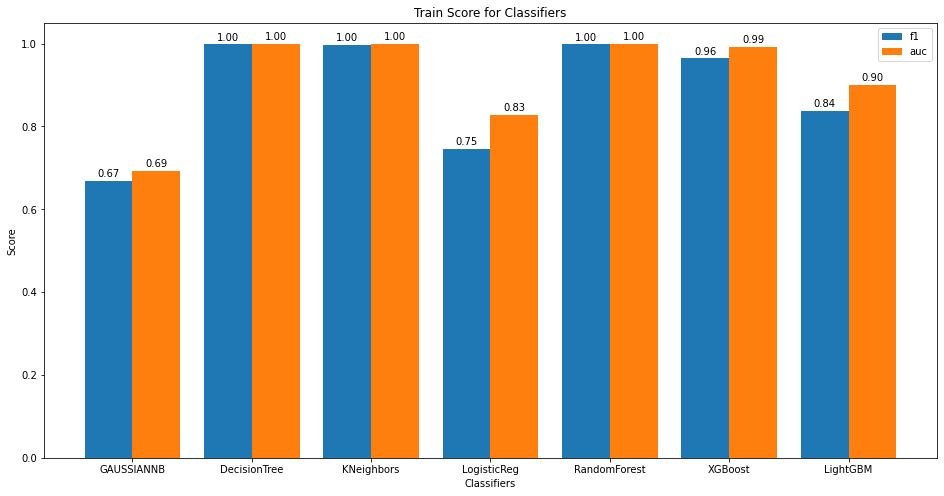

Testing GAUSSIANNB...
 ###### Confusion Matrix #######
[[ 249 5453]
 [ 104 5562]]
 ###############################
 executed in 0.1 seconds.
Testing DecisionTree...
 ###### Confusion Matrix #######
[[5261  441]
 [  16 5650]]
 ###############################
 executed in 0.0 seconds.
Testing KNeighbors...
 ###### Confusion Matrix #######
[[5324  378]
 [  27 5639]]
 ###############################
 executed in 17.6 seconds.
Testing LogisticReg...
 ###### Confusion Matrix #######
[[4363 1339]
 [1531 4135]]
 ###############################
 executed in 0.0 seconds.
Testing RandomForest...
 ###### Confusion Matrix #######
[[5638   64]
 [  16 5650]]
 ###############################
 executed in 0.5 seconds.
Testing XGBoost...
 ###### Confusion Matrix #######
[[5264  438]
 [ 227 5439]]
 ###############################
 executed in 0.1 seconds.
Testing LightGBM...
 ###### Confusion Matrix #######
[[4526 1176]
 [ 819 4847]]
 ###############################
 executed in 0.1 seconds.


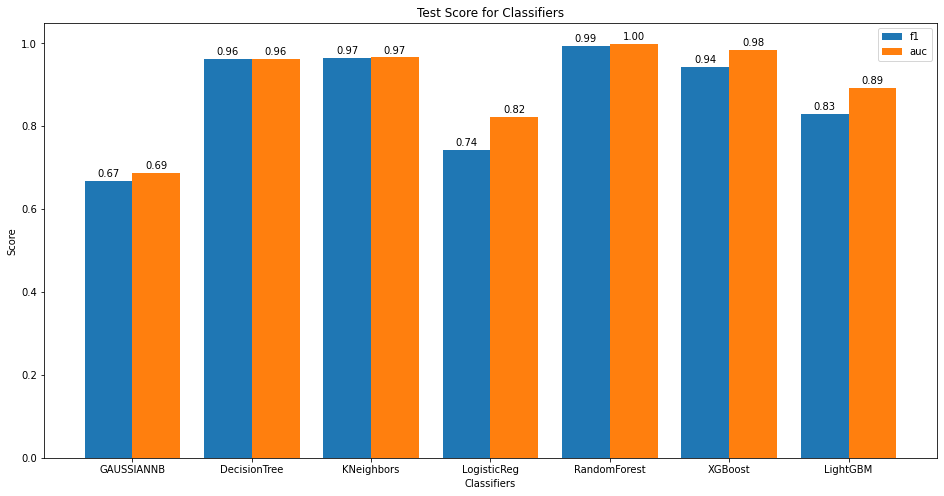

In [4]:

col     = "TARGET"
exclude = ["ID"]

# drop excluded columns and target column for X value
X = df_train.drop(exclude + [col], axis=1).values

# get target values
y = df_train[col].values

classifiers  = Classifiers(X, y, test_size=0.20, classifiers = CustomMLClassifiers.list(set_class_weight=False))

scores_train = classifiers.compare_train(cv=5)
score_test   = classifiers.compare_test()

